## Task 3

In [49]:
import sys
sys.path.insert(0,'../scripts')
import warnings
warnings.filterwarnings('ignore')

In [48]:
# library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


In [3]:
# local modules imports
from data_information import DataInfo
from experience import Data

In [16]:
# import data
df = pd.read_csv('../data/Week1_challenge_data_source.csv')
exp = Data(df)
exp_df = exp.df

#### Treat missing values

In [5]:
# function to fill numeric values
def fill_numeric_values(df, acceptable_skewness: float = 5.0):
        #df_skew_data = df
        df_skew = df.skew(axis=0, skipna=True)
        for i in df_skew.index:
            if(df_skew[i] < acceptable_skewness and df_skew[i] > (acceptable_skewness * -1)):
                value = df[i].mean()
                df[i].fillna(value, inplace=True)
            else:
                value = df[i].median()
                df[i].fillna(value, inplace=True)

        return df

In [6]:
fill_numeric_values(df)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [7]:
#forward - start and end 

def fill_values(df, col, ffill: bool = True, bfill: bool = False):
    if(ffill == True and bfill == True):
        df[col] = df[col].fillna(method='ffill')
        df[col] = df[col].fillna(method='bfill')
    
    elif(ffill == True and bfill == False):
        df[col] = df[col].fillna(method='ffill')
    
    elif(ffill == False and bfill == True):
        df[col] = df[col].fillna(method='bfill')
        
    else:
        df[col] = df[col].fillna(method='bfill')
        df[col] = df[col].fillna(method='ffill')
        
    return df[col]

In [8]:
df['Start'] = fill_values(df = df, col = 'Start')
df['End'] = fill_values(df = df, col = 'End')

In [9]:
# fill columns with mode 
df['Last Location Name'] = df['Last Location Name'].fillna(df['Last Location Name'].mode()[0])
df['Handset Manufacturer'] = df['Handset Manufacturer'].fillna(df['Handset Manufacturer'].mode()[0])
df['Handset Type'] = df['Handset Type'].fillna(df['Handset Type'].mode()[0])

In [10]:
df.isnull().sum().sum()

0

#### Treat outliers

In [12]:
experience_df = exp.fix_outlier(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','Avg RTT DL (ms)', 'Avg RTT UL (ms)',
                      'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)'])
experience_df.loc[:,'Handset Type'].isnull().sum().sum()

0

#### calculate variable

In [14]:
def create_new_columns(df, new_col_name: str, col1: str, col2: str, func):
    df[new_col_name] = func(df[col1], df[col2])
    return df

In [15]:
def merge_add(col1:pd.Series, col2:pd.Series):
    return col1.add(col2)

create_new_columns(df, 'TCP_retransmission(Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', merge_add)
create_new_columns(df, 'Avg_RTT(ms)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', merge_add)
create_new_columns(df, 'Avg_throughput', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', merge_add)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),TCP_retransmission(Bytes),Avg_RTT(ms),Avg_throughput
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08,589679.5,47.0,67.000000
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08,589679.5,70.0,42.000000
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08,589679.5,50.0,15.000000
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08,589679.5,50.0,88.000000
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08,589679.5,50.0,15.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08,589679.5,32.0,117.000000
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08,589679.5,29.0,77.000000
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08,589679.5,49.0,90.000000
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08,589679.5,42.0,71.000000


In [18]:
agg_col = {'TCP_retransmission(Bytes)':'sum', 
               'Avg_RTT(ms)':'sum',
               'Avg_throughput': 'sum'}

experience_df = experience_df.groupby('MSISDN/Number').agg(agg_col)
rn_df = exp_df.loc[:,['MSISDN/Number','Handset Type']]
rn_df = rn_df.groupby('MSISDN/Number')
experience_df['Handset Type'] = rn_df.first().loc[experience_df.index.to_list(),['Handset Type']]
experience_df

,TCP_retransmission(Bytes),Avg_RTT(ms),Avg_throughput,Handset Type
MSISDN/Number,,,,
3.360100e+10,589679.5,46.0,76.0,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,589679.5,31.0,99.0,Apple iPhone 7 (A1778)
3.360100e+10,589679.5,50.0,97.0,undefined
3.360101e+10,22015.5,84.0,248.0,Apple iPhone 5S (A1457)
3.360101e+10,1179611.5,119.0,40498.0,Apple iPhone Se (A1723)
...,...,...,...,...
3.379000e+10,218045.0,52.0,10365.0,Huawei Honor 9 Lite
3.379000e+10,589679.5,40.0,116.0,Apple iPhone 8 Plus (A1897)
3.197021e+12,589679.5,50.0,1.0,Quectel Wireless. Quectel Ec25-E


### Compute & list 10 of the top, bottom and most frequent:

In [19]:
values = Data(experience_df)

* TCP values in the dataset.

In [26]:
# top and bottom 10
values.get_min_max_of_column('TCP_retransmission(Bytes)',10)

,Max Value/s,Min Value/s
0,589010873.0,97.0
1,15003039.0,128.0
2,13590059.5,129.0
3,12842250.5,134.0
4,12499866.0,143.0
5,12449479.5,176.0
6,12381364.0,177.0
7,11914056.5,179.0
8,11789020.5,182.0
9,11698865.0,189.0


* RTT values in the dataset.

In [32]:
# top and bottom 10
values.get_min_max_of_column('Avg_RTT(ms)',10)

,Max Value/s,Min Value/s
0,61532.0,0.0
1,1062.0,2.0
2,916.0,4.0
3,891.0,5.0
4,839.0,6.0
5,825.0,8.0
6,806.0,9.0
7,782.0,10.0
8,776.0,11.0
9,775.0,12.0


* Throughput values in the dataset.

In [33]:
# top and bottom 10
values.get_min_max_of_column('Avg_throughput',10)

,Max Value/s,Min Value/s
0,1.006661e+07,0.0
1,2.684800e+05,1.0
2,2.478220e+05,2.0
3,2.452100e+05,3.0
4,2.385740e+05,4.0
5,2.368040e+05,5.0
6,2.337460e+05,6.0
7,2.303760e+05,7.0
8,2.298740e+05,8.0
9,2.273100e+05,9.0


### Compute & report:
The distribution of the average throughput  per handset type and provide interpretation for your findings.
The average TCP retransmission view per handset type and provide interpretation for your findings.

* Distribution of Average throughput per Handset Type

In [36]:
aggs = {'Avg_throughput': 'sum'}
experience_df.groupby('Handset Type').agg(aggs)

,Avg_throughput
Handset Type,
A-Link Telecom I. Cubot A5,23510.0
A-Link Telecom I. Cubot Note Plus,6699.0
A-Link Telecom I. Cubot Note S,8937.0
A-Link Telecom I. Cubot Nova,613.0
A-Link Telecom I. Cubot Power,405.0
...,...
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,116.0
Zyxel Communicat. Lte7460,39804.0
Zyxel Communicat. Sbg3600,126.0


* Average TCP retransmission view per handset type

In [37]:
aggs = {'TCP_retransmission(Bytes)': 'sum'}
experience_df.groupby('Handset Type').agg(aggs)

,TCP_retransmission(Bytes)
Handset Type,
A-Link Telecom I. Cubot A5,5.896795e+05
A-Link Telecom I. Cubot Note Plus,6.162130e+05
A-Link Telecom I. Cubot Note S,6.359820e+05
A-Link Telecom I. Cubot Nova,1.371700e+05
A-Link Telecom I. Cubot Power,8.041000e+03
...,...
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,6.132890e+05
Zyxel Communicat. Lte7460,5.896795e+05
Zyxel Communicat. Sbg3600,5.896795e+05


### k-means clustering (where k = 3) to segment users into groups of experiences

In [42]:
# standardize
std_experience_df = experience_df.copy(deep=True)
std = Data(std_experience_df)
std_experience_df = std.standardize_column('Avg_throughput')
std_experience_df = std.standardize_column('Avg_RTT(ms)')
std_experience_df = std.standardize_column('TCP_retransmission(Bytes)')
std_experience_df = std_experience_df.iloc[:,:-1]

In [43]:
std_experience_df.head()

,TCP_retransmission(Bytes),Avg_RTT(ms),Avg_throughput
MSISDN/Number,,,
3.360100e+10,-0.141881,-0.142110,-0.257798
3.360100e+10,-0.141881,-0.218348,-0.257162
3.360100e+10,-0.141881,-0.121780,-0.257217
3.360101e+10,-0.423120,0.051025,-0.253039
3.360101e+10,0.150391,0.228913,0.860621


In [44]:
kmeans = KMeans(n_clusters=3)
identified_clusters = kmeans.fit_predict(std_experience_df)

#identified_clusters.head(20)

np.argsort(identified_clusters)

array([    0, 70050, 70049, ..., 99794, 86710, 25631])

# Centroids of the clustering:
[[ 2.0832839   1.49097213  2.64067734]
 [ 0.32453518  0.19867274  0.60550512]
 [-0.11869295 -0.07715593 -0.1954749 ]]
# The number of iterations required to converge: 281414.65804025735
# The number of iterations required to converge: 23


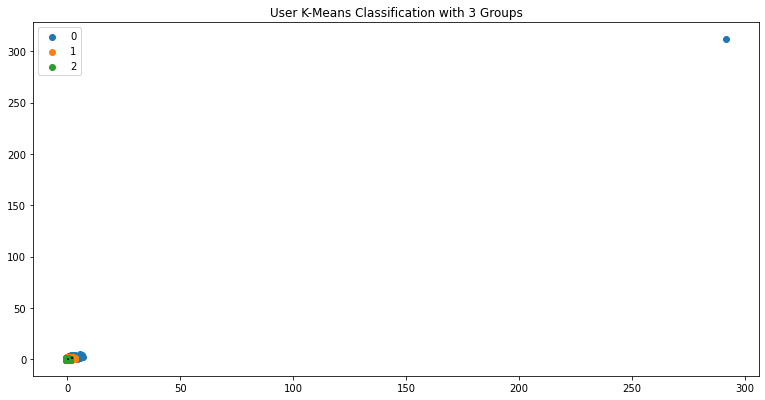

In [50]:
km = KMeans(init="random",n_clusters=3,n_init=10)
label = km.fit_predict(std_experience_df)
centroids = km.cluster_centers_
print(f'# Centroids of the clustering:\n{centroids}')
print(f'# The number of iterations required to converge: {km.inertia_}')
print(f'# The number of iterations required to converge: {km.n_iter_}')

#Getting index based on clusters
u_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(13,6.5))
plt.title(f'User K-Means Classification with 3 Groups')
for i in u_labels:
    plt.scatter(std_experience_df[label == i].iloc[:,0] , std_experience_df[label == i].iloc[:,1],
                marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1],centroids[:,2], marker='x', color = 'black')
plt.legend()
plt.show()

clusters are inter-related.